In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import itertools
import time

In [54]:
data_dir = '/content/drive/My Drive/MIE498 Thesis/Share-Bike-Station-Clustering-and-Usage-Prediction/prediction_results'
checkin_errors_k2_8 = pd.read_csv("{}/CheckinErrors_K2=8.csv".format(data_dir), header=0, index_col=0)
checkin_errors_k2_12 = pd.read_csv("{}/CheckinErrors_K2=12.csv".format(data_dir), header=0, index_col=0)
checkin_errors_k2_16 = pd.read_csv("{}/CheckinErrors_K2=16.csv".format(data_dir), header=0, index_col=0)
checkout_errors_k2_8 = pd.read_csv("{}/CheckoutErrors_K2=8.csv".format(data_dir), header=0, index_col=0)
checkout_errors_k2_12 = pd.read_csv("{}/CheckoutErrors_K2=12.csv".format(data_dir), header=0, index_col=0)
checkout_errors_k2_16 = pd.read_csv("{}/CheckoutErrors_K2=16.csv".format(data_dir), header=0, index_col=0)
obj_func_vals_all = pd.read_csv('/content/drive/My Drive/MIE498 Thesis/Share-Bike-Station-Clustering-and-Usage-Prediction/objective_function_values.csv', header=0, index_col=0)
obj_func_vals_all['n Clustering Iterations'] = obj_func_vals_all['n Clustering Iterations'].astype("int")
obj_func_vals_all['k2'] = obj_func_vals_all['k2'].astype("int")
obj_func_vals_all['n Transition Matrix'] = obj_func_vals_all['n Transition Matrix'].astype("int")

In [20]:
k2_list = [8, 12, 16]
checkin_errors_df_list = [checkin_errors_k2_8, checkin_errors_k2_12, checkin_errors_k2_16]
checkin_errors_all = pd.DataFrame(columns=['n Clustering Iterations', 'k2', 'n Transition Matrix', 'Temperature', 'mse', 'rmse', 'mre', 'mae'])
for k, k2_val in enumerate(k2_list):
  for idx, row in checkin_errors_df_list[k].iterrows():
    df_temp = {'n Clustering Iterations' : row[0], 'k2' : k2_list[k], 'n Transition Matrix' : row[1], 'Temperature': row[2], 'mse': row[3], 'rmse': row[4], 'mre': row[5], 'mae': row[6]}
    checkin_errors_all = checkin_errors_all.append(df_temp, ignore_index=True)

checkout_errors_df_list = [checkout_errors_k2_8, checkout_errors_k2_12, checkout_errors_k2_16]
checkout_errors_all = pd.DataFrame(columns=['n Clustering Iterations', 'k2', 'n Transition Matrix', 'Temperature', 'mse', 'rmse', 'mre', 'mae'])
for k, k2_val in enumerate(k2_list):
  for idx, row in checkout_errors_df_list[k].iterrows():
    df_temp = {'n Clustering Iterations' : row[0], 'k2' : k2_list[k], 'n Transition Matrix' : row[1], 'Temperature': row[2], 'mse': row[3], 'rmse': row[4], 'mre': row[5], 'mae': row[6]}
    checkout_errors_all = checkout_errors_all.append(df_temp, ignore_index=True)

# No Temp, MSE

In [51]:
checkout_errors_noTemp = checkout_errors_all[checkout_errors_all['Temperature'] == True][['n Transition Matrix', 'mse']]  # regardless of n clustering iterations and value of k2
# for checkout, the prediction error is the same regardless of number of transition matrices
x_checkout_1TM = checkout_errors_noTemp[checkout_errors_noTemp['n Transition Matrix'] == 1]['mse'].to_numpy()
x_checkout_24TM = checkout_errors_noTemp[checkout_errors_noTemp['n Transition Matrix'] == 24]['mse'].to_numpy()
x_checkout_48TM = checkout_errors_noTemp[checkout_errors_noTemp['n Transition Matrix'] == 48]['mse'].to_numpy()

In [52]:
checkin_errors_noTemp = checkin_errors_all[checkin_errors_all['Temperature'] == True][['n Transition Matrix', 'mse']]  # regardless of n clustering iterations and value of k2
y_checkin_1TM = checkin_errors_noTemp[checkin_errors_noTemp['n Transition Matrix'] == 1]['mse'].to_numpy()
y_checkin_24TM = checkin_errors_noTemp[checkin_errors_noTemp['n Transition Matrix'] == 24]['mse'].to_numpy()
y_checkin_48TM = checkin_errors_noTemp[checkin_errors_noTemp['n Transition Matrix'] == 48]['mse'].to_numpy()

In [41]:
x_checkout_1TM

array([ 95.145, 103.092, 116.434, 116.662,  87.172,  96.045,  89.8  ,
       110.498,  98.683, 115.236,  94.681,  91.115,  90.122,  95.559,
        93.961])

In [44]:
y_checkin_1TM

array([63.115, 68.821, 76.784, 79.887, 64.527, 62.237, 60.286, 76.348,
       68.602, 77.808, 65.488, 64.931, 59.566, 66.303, 72.333])

In [61]:
def generate_plot(x1, x24, x48, y1, y24, y48, xlabelname, ylabelname, titlename):
  fig = figure(figsize=(15, 6), dpi=80)
  plt.scatter(x1, y1, marker='o', label='n Transition Matrix = 1', color='plum')
  plt.scatter(x24, y24, marker='+', label='n Transition Matrix = 24', color='tomato')
  plt.scatter(x48, y48, marker='x', label='n Transition Matrix = 48', color='green')

  plt.xlabel(xlabelname)
  plt.ylabel(ylabelname)
  plt.title(titlename)
  plt.legend()
  plt.grid()
  plt.show()
  return fig

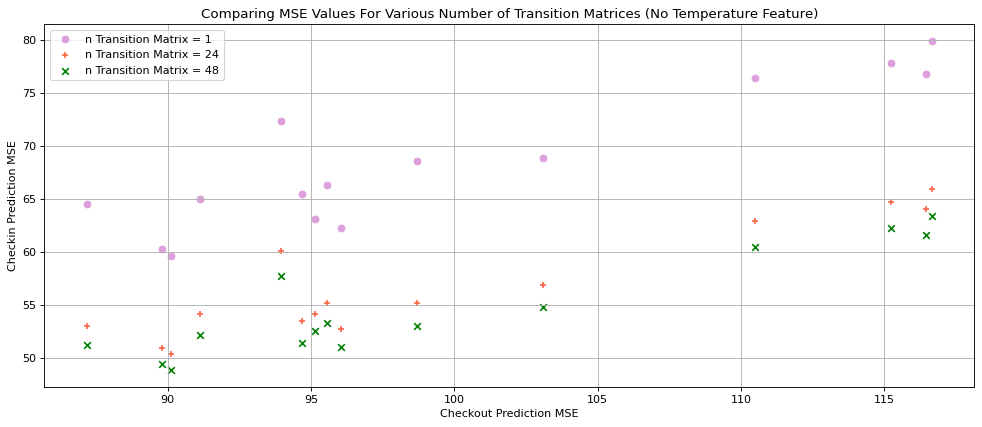

In [63]:
xlabelname, ylabelname, titlename ='Checkout Prediction MSE', 'Checkin Prediction MSE', 'Comparing MSE Values For Various Number of Transition Matrices (No Temperature Feature)'
fig1 = generate_plot(x1=x_checkout_1TM, x24=x_checkout_24TM, x48=x_checkout_48TM, y1=y_checkin_1TM, y24=y_checkin_24TM, y48=y_checkin_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)

# Metrics -- Prediction Errors Plots

In [64]:
# regardless of n clustering iterations and value of k2
x_metric1_1TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 1]['Metric 1'].to_numpy()
x_metric1_24TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 24]['Metric 1'].to_numpy()
x_metric1_48TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 48]['Metric 1'].to_numpy()
x_metric2_checkout_1TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 1]['Metric 2 (Checkout)'].to_numpy()
x_metric2_checkout_24TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 24]['Metric 2 (Checkout)'].to_numpy()
x_metric2_checkout_48TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 48]['Metric 2 (Checkout)'].to_numpy()
x_metric2_checkin_1TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 1]['Metric 2 (Checkin)'].to_numpy()
x_metric2_checkin_24TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 24]['Metric 2 (Checkin)'].to_numpy()
x_metric2_checkin_48TM = obj_func_vals_all[obj_func_vals_all['n Transition Matrix'] == 48]['Metric 2 (Checkin)'].to_numpy()

## Metric 1

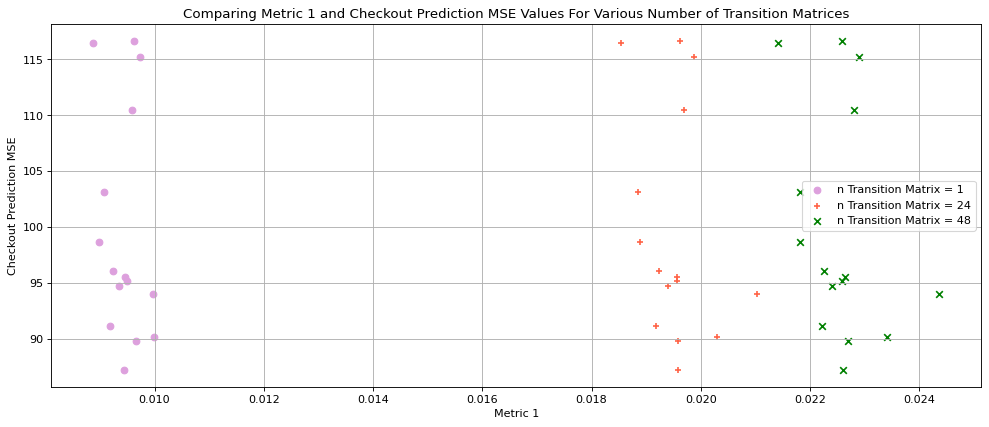

In [71]:
xlabelname, ylabelname, titlename ='Metric 1', 'Checkout Prediction MSE', 'Comparing Metric 1 and Checkout Prediction MSE Values For Various Number of Transition Matrices'
fig1 = generate_plot(x1=x_metric1_1TM, x24=x_metric1_24TM, x48=x_metric1_48TM, y1=x_checkout_1TM, y24=x_checkout_24TM, y48=x_checkout_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)

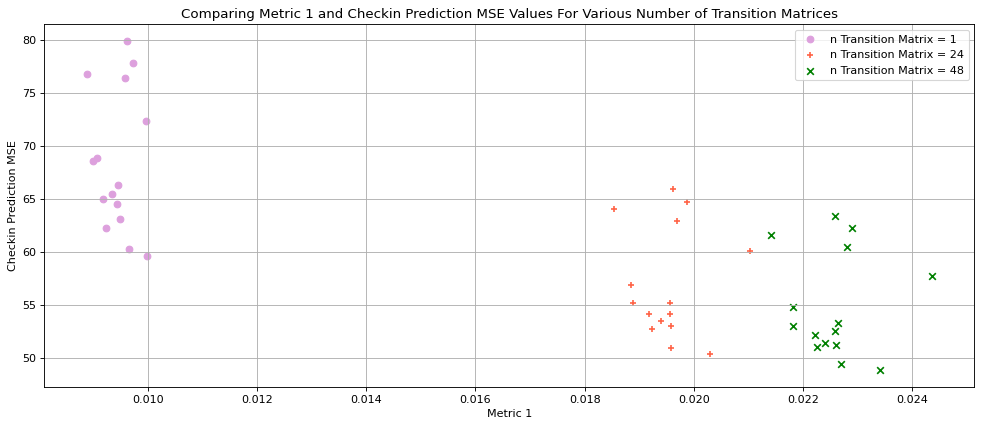

In [72]:
xlabelname, ylabelname, titlename ='Metric 1', 'Checkin Prediction MSE', 'Comparing Metric 1 and Checkin Prediction MSE Values For Various Number of Transition Matrices'
fig1 = generate_plot(x1=x_metric1_1TM, x24=x_metric1_24TM, x48=x_metric1_48TM, y1=y_checkin_1TM, y24=y_checkin_24TM, y48=y_checkin_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)

## Metric 2

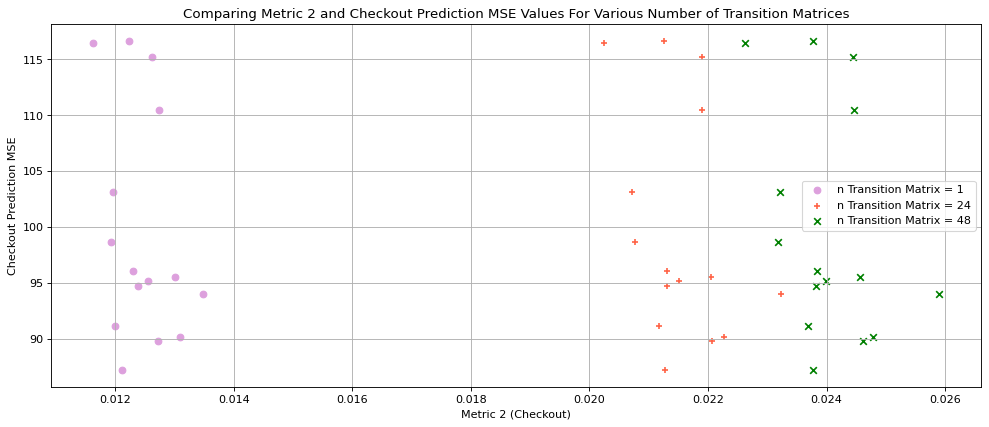

In [70]:
xlabelname, ylabelname, titlename ='Metric 2 (Checkout)', 'Checkout Prediction MSE', 'Comparing Metric 2 and Checkout Prediction MSE Values For Various Number of Transition Matrices'
fig1 = generate_plot(x1=x_metric2_checkout_1TM, x24=x_metric2_checkout_24TM, x48=x_metric2_checkout_48TM, y1=x_checkout_1TM, y24=x_checkout_24TM, y48=x_checkout_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)

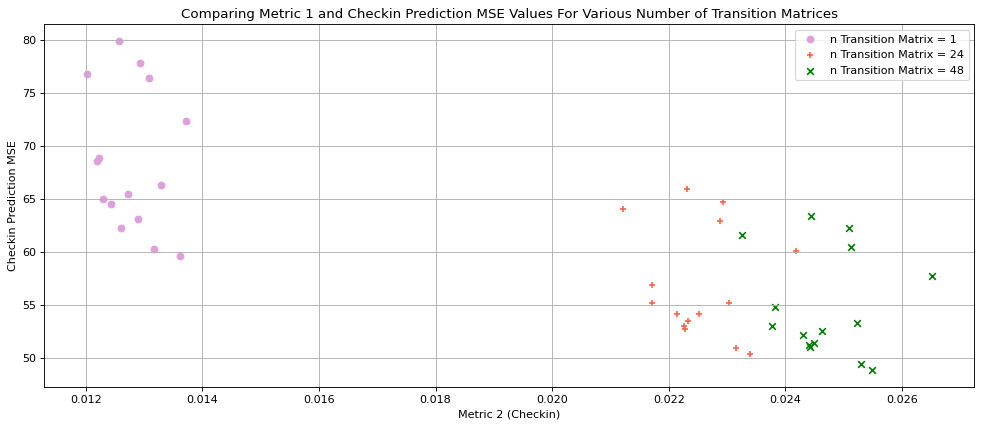

In [73]:
xlabelname, ylabelname, titlename ='Metric 2 (Checkin)', 'Checkin Prediction MSE', 'Comparing Metric 1 and Checkin Prediction MSE Values For Various Number of Transition Matrices'
fig1 = generate_plot(x1=x_metric2_checkin_1TM, x24=x_metric2_checkin_24TM, x48=x_metric2_checkin_48TM, y1=y_checkin_1TM, y24=y_checkin_24TM, y48=y_checkin_48TM, xlabelname=xlabelname, ylabelname=ylabelname, titlename=titlename)